<a href="https://colab.research.google.com/github/anmol0720/Time-Series-Forcasting/blob/master/TensorFlow_with_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
dataframe=pd.read_csv("daily-total-female-births-CA.csv",header=0)

In [10]:
dataframe.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [11]:
#System is treating dates here as objects or strings
dataframe['date'].dtype

dtype('O')

To let the system identify dates as dates

In [0]:
#[0] because we have date at our first column
df2=pd.read_csv("daily-total-female-births-CA.csv",header=0,parse_dates=[0])

In [14]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [15]:
df2['date'].dtype
#Here we see that now the system identifies dates in date formate

dtype('<M8[ns]')

#Load Data as Series
We need to make the date time column as our index column

In [0]:
series=dataframe=pd.read_csv("daily-total-female-births-CA.csv",header=0,parse_dates=[0],index_col=0,squeeze=True)

In [18]:
#Here we get the series name as birth
series.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

##Exploring Time Series Data

In [19]:
series.shape

(365,)

In [20]:
df2.shape

(365, 2)

##Quering by Time
By using Series

In [21]:
print(series['1959-01'])

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: births, dtype: int64


By using Dataframe

In [22]:
df2[(df2['date']>'1959-01-01')&(df2['date']<'1959-01-21')]

,date,births
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27
10,1959-01-11,38


Statistical Description

In [24]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [25]:
df2.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


#Time Series Data Visualization

Line Chart

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
df3=df2.copy()

In [34]:
df3.head(10)

,date,births
date,,
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38


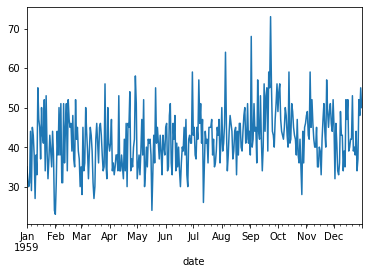

In [35]:
#We get index value at X-axis in the following plot
df3['births'].plot()

In [0]:
#Now to get index as date
df3.index=df3['date']

In [37]:
df3.head(10)

,date,births
date,,
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38


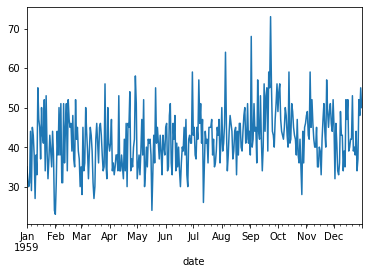

In [39]:
#We get a date in the X-axis
df3['births'].plot()

##Zooming In

In [0]:
df4=df3[(df3['date']>'1959-01-01')&(df3['date']<'1959-01-10')]

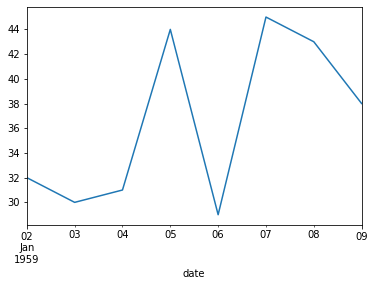

In [42]:
df4['births'].plot()

Trendlines

In [43]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


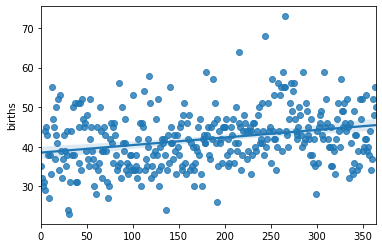

In [48]:
sns.regplot(x=df2.index.values,y=df2['births'])

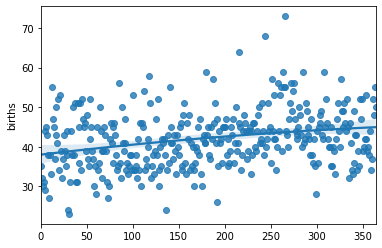

In [49]:
#Quadratic Trendline
sns.regplot(x=df2.index.values,y=df2['births'],order=2)

In [0]:
miles_df=pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv',header=0,parse_dates=[0])

In [52]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462
